In [1]:
import EntropyHub as EH
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pickle

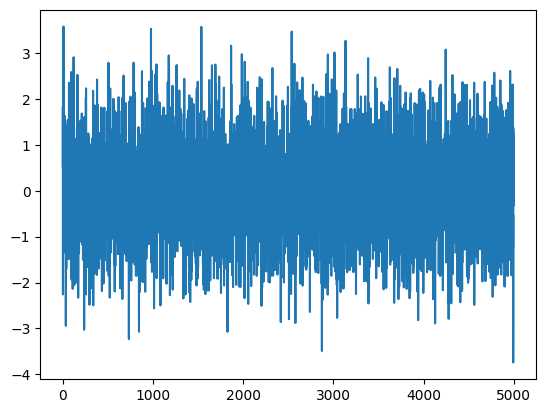

In [6]:
X = EH.ExampleData("gaussian")
plt.plot(X)

In [2]:
PICKLE_FILE_PATH_DS = '/Users/reva/Documents/Python/SE_DA_FPM/data/df_combined_SE_all_drugs.pkl'
df = pd.read_pickle(PICKLE_FILE_PATH_DS)

In [5]:
df[df["session"]=="Raclopride"]

,file,session,Ep2_timestamps,bl_rec_data,bl_rec_samplerate,bl_rec_tstart,bl_rec_tend,Epopto_timestamps
24,Lus021631_VS-220926-094459,Raclopride,"[530.6425354480743, 530.6445014476776, 625.426...","[-0.9997144937515259, -0.9997178316116333, -0....",[1017.2526245117188],[9.5367431640625e-07],[2417.931387758793],"[243.1685435771942, 243.41839957237244, 253.16..."
25,Lus021636_VS-220926-090621,Raclopride,"[427.5181987285614, 427.5203285217285, 492.976...","[-1.0000762939453125, -1.0000888109207153, -1....",[1017.2526245117188],[9.5367431640625e-07],[2147.3987797265663],"[220.44983386993408, 220.6996898651123, 230.44..."
26,Lus021829_DS-220926-110256,Raclopride,"[385.01073002815247, 385.01269602775574, 437.1...","[-0.9990139603614807, -0.9990262985229492, -0....",[1017.2526245117188],[9.5367431640625e-07],[1997.0329814916265],"[152.13019227981567, 152.3800482749939, 162.12..."
27,Lus021830_DS-220926-113745,Raclopride,"[873.311601638794, 873.3135676383972, 902.2424...","[-0.9698135852813721, -0.9699610471725464, -0....",[1017.2526245117188],[9.5367431640625e-07],[2856.320041990818],"[519.7198140621185, 519.9695062637329, 529.718..."
28,Lus021832_DS-220926-142609,Raclopride,"[477.0971658229828, 477.09913182258606, 697.07...","[-0.9976845383644104, -0.9976677298545837, -0....",[1017.2526245117188],[9.5367431640625e-07],[1958.025954342426],"[180.72748136520386, 180.97733736038208, 190.7..."
29,Lus021836_VS-220926-135113,Raclopride,"[488.83204197883606, 488.83400797843933, 553.7...","[-0.9989957213401794, -0.9989966750144958, -0....",[1017.2526245117188],[9.5367431640625e-07],[1832.4484923844946],"[239.3396029472351, 239.5892951488495, 249.338..."
30,Lus021869_VS-220926-103020,Raclopride,"[545.4594056606293, 545.4613718986511, 590.322...","[-0.9983479976654053, -0.9983485341072083, -0....",[1017.2526245117188],[9.5367431640625e-07],[1811.1833711629522],"[259.49978709220886, 259.7496430873871, 269.49..."
31,Lus021870_VS-220926-130700,Raclopride,"[1090.1603951454163, 1090.162361383438, 1156.9...","[-0.9985509514808655, -0.9985361695289612, -0....",[1017.2526245117188],[9.5367431640625e-07],[2510.6674493318214],"[183.25356650352478, 183.503422498703, 193.252..."


Text(0.5, 1.0, 'Example of DA Fentanyl in DS')

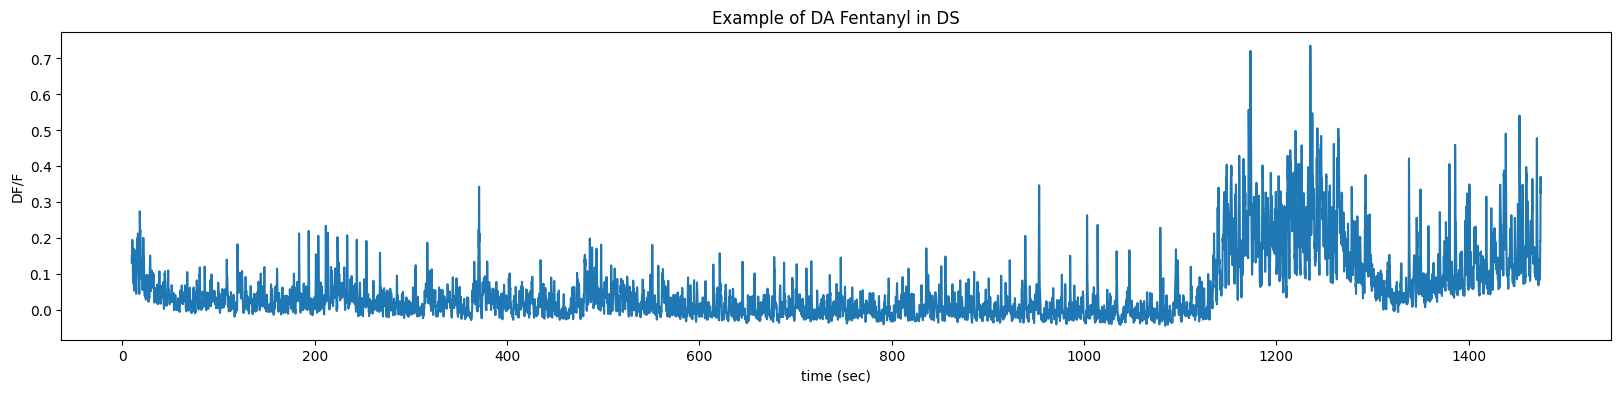

In [14]:
plt.figure(figsize=(20, 4))
time_points = np.arange(0, 1500000)
fs = 1017  # Sampling rate in Hz

# Convert time points to seconds
time_in_seconds = time_points / fs
plt.plot(time_in_seconds[10000:1500000],df["bl_rec_data"][31][10000:1500000])
plt.ylabel("DF/F")
plt.xlabel("time (sec)")
plt.title("Example of DA Fentanyl in DS")
#plt.ylim([-0.1, 0.44])

In [17]:
df['file_prefix'] = df['file'].apply(lambda x: x.split('_')[0])

# Group the signals by "file_prefix" field and concatenate signals
grouped_signals = df.groupby('file_prefix')['base_before_coc'].apply(lambda x: np.concatenate(x.values)).reset_index()
for signal_idx, row in grouped_signals.iterrows():
        signal = row['base_before_coc']
        Samp, _, _ = EH.SampEn(signal, m = 4)
        print(Samp)

array([2.17892361, 2.17574233, 2.18196957, 2.22098398, 2.17556672])

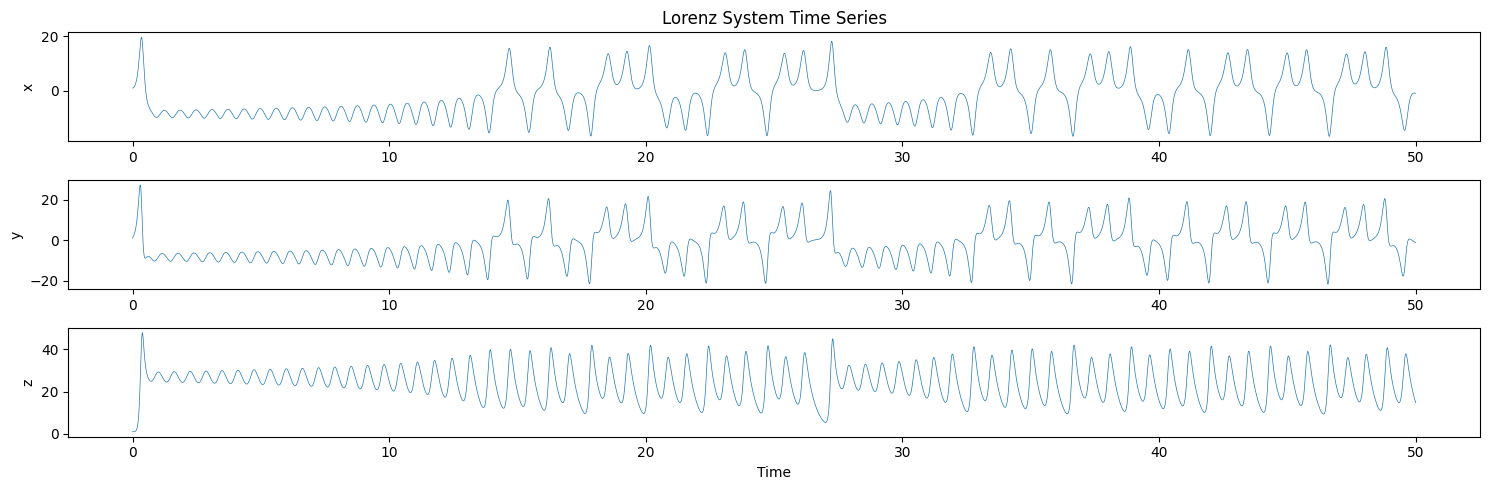

In [5]:
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the Lorenz system
sigma = 10.0
rho = 28.0
beta = 8.0 / 3.0

# Lorenz system differential equations
def lorenz(t, state):
    x, y, z = state
    dxdt = sigma * (y - x)
    dydt = x * (rho - z) - y
    dzdt = x * y - beta * z
    return [dxdt, dydt, dzdt]

# Initial state and time span
initial_state = [1.0, 1.0, 1.0]
t_span = (0, 50)
t_eval = np.linspace(t_span[0], t_span[1], 10000)

# Solve the Lorenz system
solution = solve_ivp(lorenz, t_span, initial_state, t_eval=t_eval)

# Extracting the data
# Extracting the data
t = solution.t
x_lorenz = solution.y[0]
y_lorenz = solution.y[1]
z_lorenz = solution.y[2]


plt.figure(figsize=(15, 5))

plt.subplot(3, 1, 1)
plt.plot(t, x_lorenz, lw=0.5)
plt.title("Lorenz System Time Series")
plt.ylabel("x")

plt.subplot(3, 1, 2)
plt.plot(t, y_lorenz, lw=0.5)
plt.ylabel("y")

plt.subplot(3, 1, 3)
plt.plot(t, z_lorenz, lw=0.5)
plt.ylabel("z")
plt.xlabel("Time")

plt.tight_layout()
plt.show()


Fractal Dimension Before: 1.9842889481467858
Fractal Dimension After: 1.955468671996417


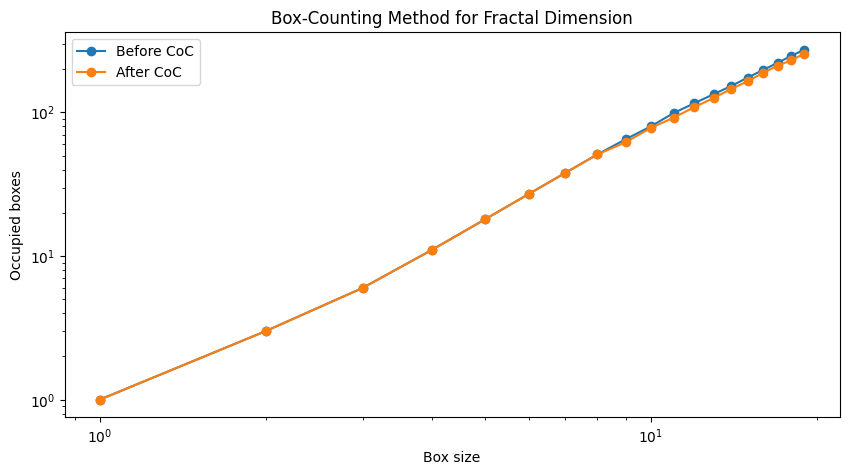

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Sample signals (replace these with your actual signals)
np.random.seed(0)
signal_before = np.sin(np.linspace(0, 20 * np.pi, 10000)) + 0.1 * np.random.randn(10000)
signal_after = np.sin(np.linspace(0, 10 * np.pi, 10000)) + 0.1 * np.random.randn(10000)  # Slower signal

# Detect peaks to identify cycles
peaks_before, _ = find_peaks(signal_before)
peaks_after, _ = find_peaks(signal_after)

# Select equal number of cycles
num_cycles = min(len(peaks_before), len(peaks_after)) - 1
selected_cycles_before = signal_before[peaks_before[0]:peaks_before[num_cycles]]
selected_cycles_after = signal_after[peaks_after[0]:peaks_after[num_cycles]]

# Calculate the velocity (numerical derivative) of the selected cycles
time_vector_before = np.linspace(0, len(selected_cycles_before) - 1, len(selected_cycles_before))
time_vector_after = np.linspace(0, len(selected_cycles_after) - 1, len(selected_cycles_after))

v_before = np.gradient(selected_cycles_before, time_vector_before)
v_after = np.gradient(selected_cycles_after, time_vector_after)

# Reconstruct phase space using displacement and velocity
phase_space_before = np.column_stack((selected_cycles_before, v_before))
phase_space_after = np.column_stack((selected_cycles_after, v_after))

# Calculate box-counting dimension
def box_counting_dimension(data, box_sizes):
    min_x, max_x = np.min(data[:, 0]), np.max(data[:, 0])
    min_y, max_y = np.min(data[:, 1]), np.max(data[:, 1])
    
    counts = []
    for size in box_sizes:
        x_bins = np.linspace(min_x, max_x, size)
        y_bins = np.linspace(min_y, max_y, size)
        
        occupied_boxes = set()
        for x, y in data:
            x_idx = np.digitize(x, x_bins)
            y_idx = np.digitize(y, y_bins)
            occupied_boxes.add((x_idx, y_idx))
        
        counts.append(len(occupied_boxes))
    return counts

def fit_fractal_dimension(box_sizes, N):
    log_box_sizes = np.log(box_sizes)
    log_N = np.log(N)
    slope, _ = np.polyfit(log_box_sizes, log_N, 1)
    return slope

box_sizes = np.arange(1, 20)
N_before = box_counting_dimension(phase_space_before, box_sizes)
N_after = box_counting_dimension(phase_space_after, box_sizes)

D_before = fit_fractal_dimension(box_sizes, N_before)
D_after = fit_fractal_dimension(box_sizes, N_after)

print(f"Fractal Dimension Before: {D_before}")
print(f"Fractal Dimension After: {D_after}")

# Plotting the log-log plot for visual confirmation
plt.figure(figsize=(10, 5))
plt.loglog(box_sizes, N_before, 'o-', label='Before CoC')
plt.loglog(box_sizes, N_after, 'o-', label='After CoC')
plt.xlabel('Box size')
plt.ylabel('Occupied boxes')
plt.legend()
plt.title('Box-Counting Method for Fractal Dimension')
plt.show()


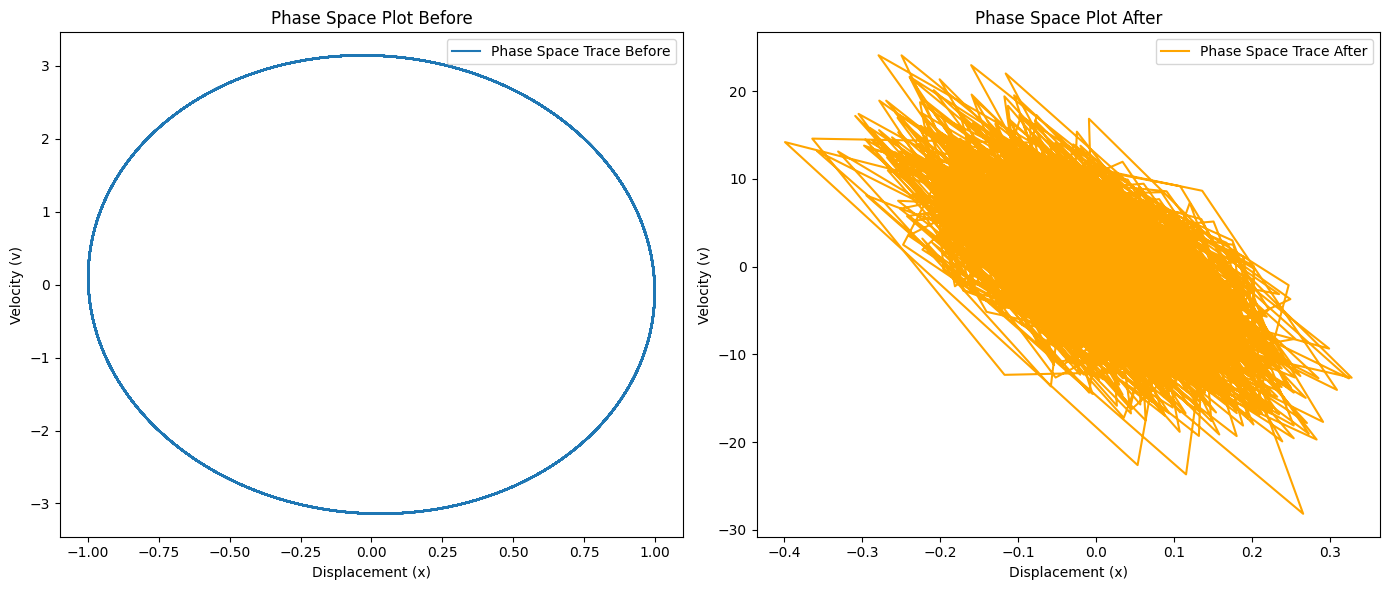

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Generate the original signal
time = np.linspace(0, 100, 5000)
signal_before = np.sin(2 * np.pi * 0.5 * time) 

# Apply a moving average to the signal
window_size = 2000
signal_after = np.convolve(signal_before, np.ones(window_size) / window_size, mode='valid')+ np.random.normal(0, 0.1, size=3001)

# Calculate the phase space (displacement and velocity)
def calculate_phase_space(signal, dt):
    displacement = signal[:-1]
    velocity = np.diff(signal) / dt
    return displacement, velocity

dt = time[1] - time[0]
displacement_before, velocity_before = calculate_phase_space(signal_before, dt)
displacement_after, velocity_after = calculate_phase_space(signal_after, dt)

# Plot the phase space
plt.figure(figsize=(14, 6))

# Plot original phase space
plt.subplot(1, 2, 1)
plt.plot(displacement_before, velocity_before, label='Phase Space Trace Before')
plt.title('Phase Space Plot Before')
plt.xlabel('Displacement (x)')
plt.ylabel('Velocity (v)')
plt.legend()

# Plot after phase space
plt.subplot(1, 2, 2)
plt.plot(displacement_after, velocity_after, label='Phase Space Trace After', color='orange')
plt.title('Phase Space Plot After')
plt.xlabel('Displacement (x)')
plt.ylabel('Velocity (v)')
plt.legend()

plt.tight_layout()
plt.show()


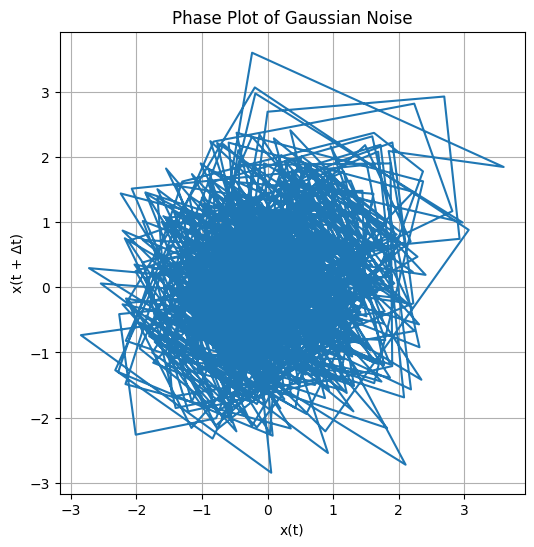

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Generate Gaussian noise
length = 1000
sigma = 1.0
gaussian_noise = np.random.normal(0, sigma, length)

# Create a phase plot: x(t) vs x(t + Δt)
delta_t = 1  # Time lag
x_t = gaussian_noise[:-delta_t]
x_t_plus_delta = gaussian_noise[delta_t:]

# Plot the phase plot
plt.figure(figsize=(6, 6))
plt.plot(x_t, x_t_plus_delta)
plt.xlabel('x(t)')
plt.ylabel('x(t + Δt)')
plt.title('Phase Plot of Gaussian Noise')
plt.grid(True)
plt.show()


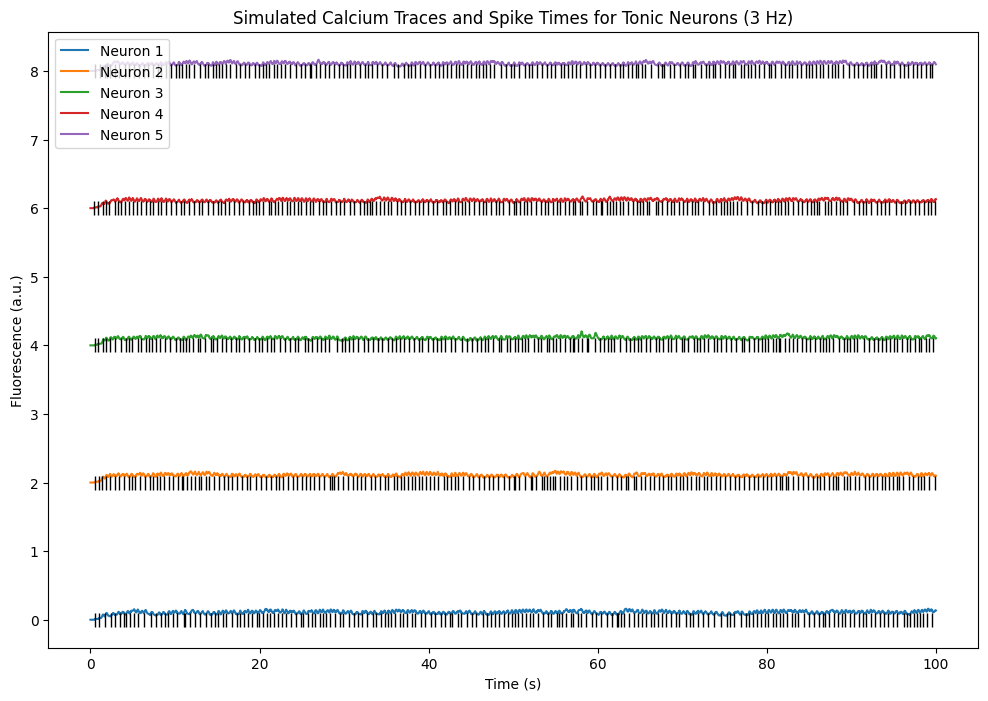

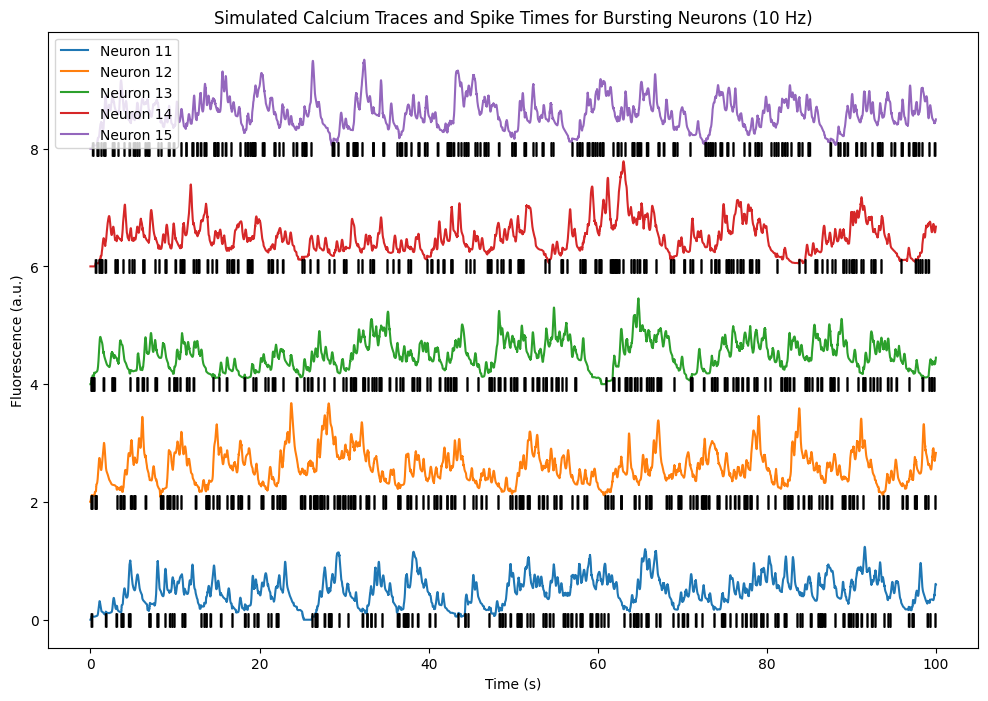

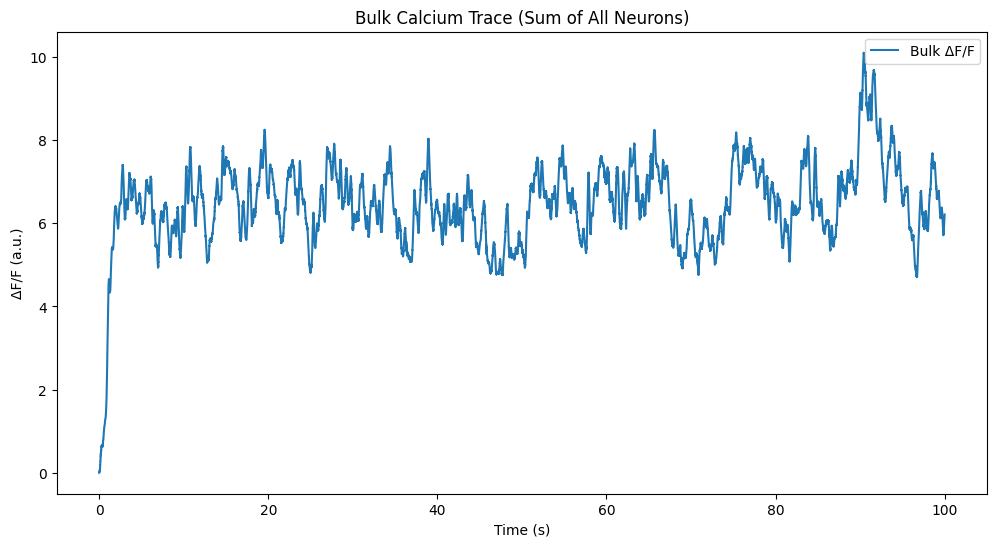

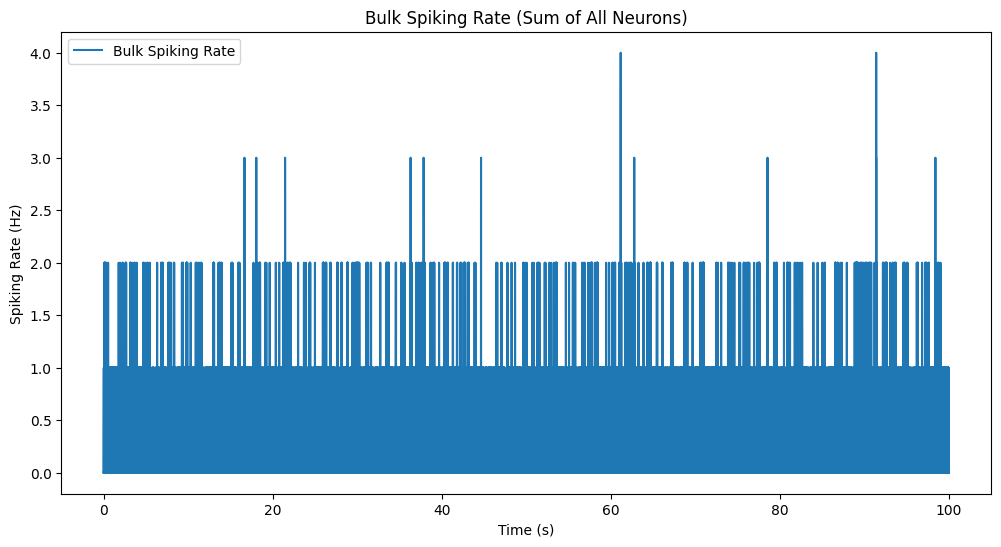

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import metrics_analysis as m_a

# Parameters
num_neurons_tonic = 10
num_neurons_bursting = 10
total_time = 100  # Total time in seconds
dt = 0.001  # Time step in seconds (1 ms)
time_points = int(total_time / dt)
tonic_rate = 2  # Firing rate for tonic neurons (3 Hz)
burst_rate = 2  # Bursts per second for bursting neurons (0.5 Hz or 1 burst every 2 seconds)
spikes_per_burst = 5  # Number of spikes per burst
inter_spike_interval = 0.01  # Interval between spikes within a burst (10 ms)
tonic_interval_noise = 0.25  # Noise as a percentage of the interval

# Create time vector
time_vector = np.arange(0, total_time, dt)

# Load or define the template waveform for a single spike
TEMPLATE_FILE_PATH = '/Users/reva/Documents/Python/SE_DA_FPM/data/Templates/Before_Cocaine_VS_mean_traces_dff.csv'
template = m_a.load_template(TEMPLATE_FILE_PATH, "25")
template_length = len(template)

# Simulate tonic (non-bursting) neurons
tonic_spike_trains = []
mean_interval_between_spikes = int(1 / tonic_rate / dt)  # Mean time points between spikes
for i in range(num_neurons_tonic):
    spike_train = np.zeros(time_points)
    current_time = 0
    while current_time < time_points:
        noisy_interval = mean_interval_between_spikes + int(
            np.random.normal(0, tonic_interval_noise * mean_interval_between_spikes)
        )
        current_time += max(1, noisy_interval)  # Ensure at least 1 time step between spikes
        if current_time < time_points:
            spike_train[current_time] = 1
    tonic_spike_trains.append(spike_train)
# Simulate bursting neurons with distinct burst patterns
bursting_spike_trains = []
for i in range(num_neurons_bursting):
    spike_train = np.zeros(time_points)
    burst_times = np.random.poisson(burst_rate * dt, time_points)
    burst_indices = np.where(burst_times > 0)[0]
    for burst_start in burst_indices:
        for j in range(spikes_per_burst):
            spike_time = burst_start + int(j * inter_spike_interval / dt)
            if spike_time < time_points:
                spike_train[spike_time] = 1
    bursting_spike_trains.append(spike_train)

# Combine spike trains
all_spike_trains = tonic_spike_trains + bursting_spike_trains

# Generate calcium traces by convolving spike trains with the template
calcium_traces = []
for spike_train in all_spike_trains:
    calcium_trace = np.convolve(spike_train, template, mode='full')[:time_points]
    calcium_traces.append(calcium_trace)

# Convert to a numpy array for easier handling
calcium_traces = np.array(calcium_traces)

# Plot example calcium traces with spike times for tonic neurons
plt.figure(figsize=(12, 8))
for i in range(5):  # Plot first 5 neurons' traces (tonic)
    # Plot calcium trace
    plt.plot(time_vector, calcium_traces[i] + i * 2, label=f'Neuron {i+1}')
    # Plot spike times as raster plot
    spike_times = np.where(all_spike_trains[i] > 0)[0] * dt
    plt.plot(spike_times, np.ones_like(spike_times) * (i * 2), '|', color='black', markersize=10)
plt.xlabel('Time (s)')
plt.ylabel('Fluorescence (a.u.)')
plt.title('Simulated Calcium Traces and Spike Times for Tonic Neurons (3 Hz)')
plt.legend()
plt.show()

# Plot example calcium traces with spike times for bursting neurons
plt.figure(figsize=(12, 8))
for i in range(10, 15):  # Plot next 5 neurons' traces (bursting)
    # Plot calcium trace
    plt.plot(time_vector, calcium_traces[i] + (i - 10) * 2, label=f'Neuron {i+1}')
    # Plot spike times as raster plot
    spike_times = np.where(all_spike_trains[i] > 0)[0] * dt
    plt.plot(spike_times, np.ones_like(spike_times) * ((i - 10) * 2), '|', color='black', markersize=10)
plt.xlabel('Time (s)')
plt.ylabel('Fluorescence (a.u.)')
plt.title('Simulated Calcium Traces and Spike Times for Bursting Neurons (10 Hz)')
plt.legend()
plt.show()

# Calculate the bulk ΔF/F (sum across all neurons)
bulk_calcium_trace = np.sum(calcium_traces, axis=0)

# Calculate the bulk spiking rate (sum of spikes across all neurons)
bulk_spike_train = np.sum(all_spike_trains, axis=0)

# Convert spike train to spike rate by binning or smoothing
# Here, we'll just plot the raw summed spike train
bulk_spike_rate = bulk_spike_train

# Plot the bulk ΔF/F signal
plt.figure(figsize=(12, 6))
plt.plot(time_vector, bulk_calcium_trace, label='Bulk ΔF/F')
plt.xlabel('Time (s)')
plt.ylabel('ΔF/F (a.u.)')
plt.title('Bulk Calcium Trace (Sum of All Neurons)')
plt.legend()
plt.show()

# Plot the bulk spike rate
plt.figure(figsize=(12, 6))
plt.plot(time_vector, bulk_spike_rate, label='Bulk Spiking Rate')
plt.xlabel('Time (s)')
plt.ylabel('Spiking Rate (Hz)')
plt.title('Bulk Spiking Rate (Sum of All Neurons)')
plt.legend()
plt.show()

/Users/reva/Documents/Python/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.4942084942084942
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


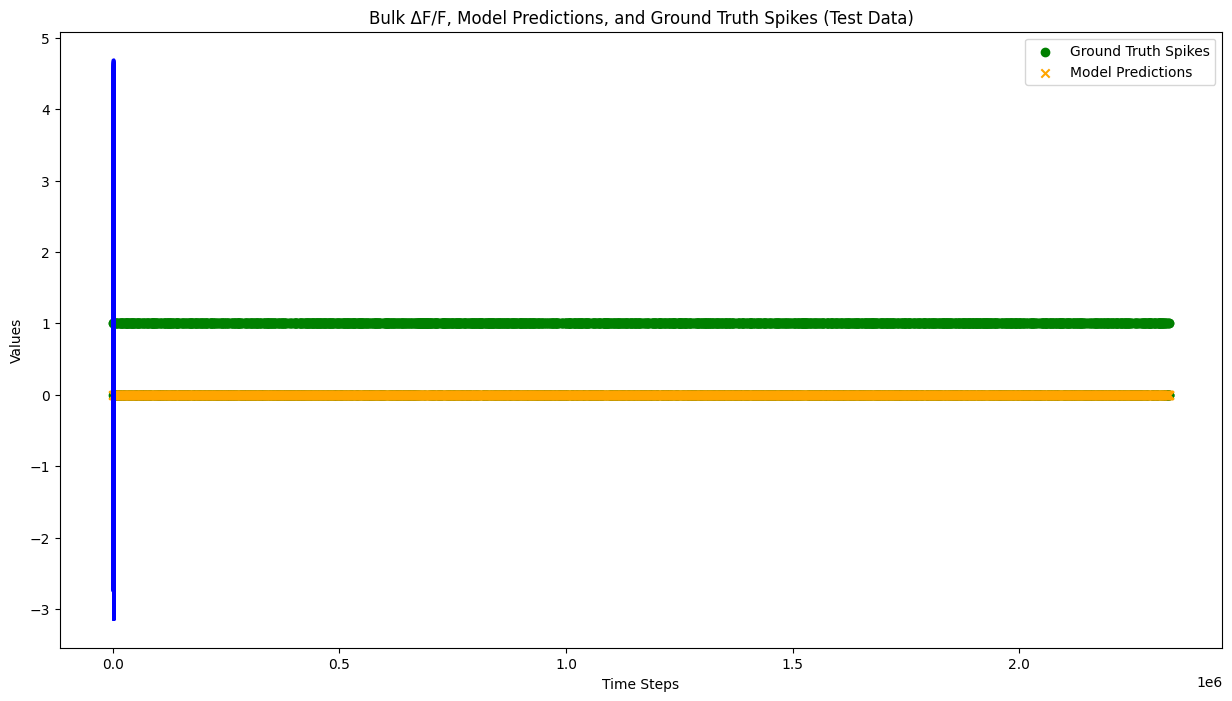

In [119]:
# Later, to load the model
import torch
import pandas as pd
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
import torch.nn.functional as F
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import torch.nn as nn


def generate_sequences(X, y, seq_length, pre_spike_window=50, post_spike_window=450):
    spike_indices = np.where(y == 1)[0]  # Find indices of spikes
    sequences_with_spikes = []
    labels_with_spikes = []

    # Generate sequences around spike events
    for spike_idx in spike_indices:
        start_idx = max(0, spike_idx - pre_spike_window)
        end_idx = min(len(X), spike_idx + post_spike_window)
        seq = X[start_idx:end_idx]
        label_seq = 1

        # Pad sequences if necessary to ensure consistent length
        if len(seq) < seq_length:
            padding_len = seq_length - len(seq)
            seq = np.pad(seq, (0, padding_len), mode='constant')  # Pad at the end
            #label_seq = np.pad(label_seq, (0, padding_len), mode='constant')

        sequences_with_spikes.append(seq)
        labels_with_spikes.append(label_seq)

    # Generate an equal number of sequences without spikes
    non_spike_indices = np.where(y == 0)[0]
   # np.random.shuffle(non_spike_indices)  # Shuffle for random selection
    non_spike_indices = non_spike_indices[:len(sequences_with_spikes)]  # Take the same number as spike sequences

    sequences_without_spikes = []
    labels_without_spikes = []
    for non_spike_idx in non_spike_indices:
        start_idx = non_spike_idx
        end_idx = min(len(X), non_spike_idx + seq_length)
        seq = X[start_idx:end_idx]
        label_seq = 0

        # Pad if necessary
        if len(seq) < seq_length:
            padding_len = seq_length - len(seq)
            seq = np.pad(seq, (0, padding_len), mode='constant')
            #label_seq = np.pad(label_seq, (0, padding_len), mode='constant')

        sequences_without_spikes.append(seq)
        labels_without_spikes.append(label_seq)

    original_start_indices_with_spikes = [max(0, spike_idx - pre_spike_window) for spike_idx in spike_indices]
    original_start_indices_without_spikes = [non_spike_idx for non_spike_idx in non_spike_indices]

    # Combine and shuffle all sequences, labels, and original start indices
    all_sequences = np.concatenate([sequences_with_spikes, sequences_without_spikes])
    all_labels = np.concatenate([labels_with_spikes, labels_without_spikes])
    all_original_start_indices = np.concatenate([original_start_indices_with_spikes, original_start_indices_without_spikes])
    
    shuffle_indices = np.arange(len(all_sequences))
    np.random.shuffle(shuffle_indices)
    all_sequences = all_sequences[shuffle_indices]
    all_labels = all_labels[shuffle_indices]
    all_original_start_indices = all_original_start_indices[shuffle_indices] 

    return all_sequences, all_labels, all_original_start_indices

seq_length = 500  # 250 ms equivalent in points

# Load the ground truth data
ground_truth_df = pd.read_csv('/Users/reva/Documents/Python/SE_DA_FPM/data/ground_truth_data_s.csv')

# Extract features and target
X = ground_truth_df['Bulk ΔF/F'].values  
y = ground_truth_df['Bulk Spike Count'].values

# Define the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Assume X and y are already loaded and preprocessed
# Normalize X
#plt.plot(X_sequences)
##plt.plot(y_sequences)
#plt.show()
# Perform the split without shuffling (to preserve time series order)
X = (X - X.mean()) / X.std()
X_sequences, y_sequences, all_original_start_indices = generate_sequences(X, y, seq_length)

# Reshape for LSTM (assuming 1 feature, which is ΔF/F)
X_sequences = X_sequences.reshape(-1, seq_length, 1)  

# Perform the split without shuffling (to preserve time series order)
X_train, X_test, y_train, y_test, original_start_indices_train, original_start_indices_test = train_test_split(
    X_sequences, y_sequences, all_original_start_indices, test_size=0.3, random_state=42, shuffle=False
)
# Convert to tensors and send to device
X_train = torch.tensor(X_train, dtype=torch.float32).to(device)
y_train = torch.tensor(y_train, dtype=torch.float32).to(device)
X_test= torch.tensor(X_test, dtype=torch.float32).to(device)
y_test = torch.tensor(y_test, dtype=torch.float32).to(device) 


# Create DataLoader objects
batch_size = 64
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = TensorDataset(X_test, y_test)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False) 

input_size = 1  # Assuming one input feature
hidden_size = 128  # Number of units in GRU hidden layers
num_layers = 3  # Number of GRU layers
dropout_prob = 0.5  # Dropout probability
output_size =1
num_filters = 64  # Number of filters in the convolutional layers
kernel_size = 3  # Size of the convolutional kernel

class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size, dropout_prob=0.5):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, dropout=dropout_prob)
        self.fc = nn.Linear(hidden_size, output_size)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        h0 = torch.zeros(num_layers, x.size(0), hidden_size).to(x.device)
        c0 = torch.zeros(num_layers, x.size(0), hidden_size).to(x.device)
        out, _ = self.lstm(x, (h0, c0))
        out = out[:, -1, :]  # Use the output of the last time step
        out = self.fc(out)
        out = self.sigmoid(out)
        return out


model = torch.load('/Users/reva/Documents/Python/SE_DA_FPM/results/Spike_infer_model.pth')


model.eval()
with torch.no_grad():
    y_pred = []
    y_true = []
    for inputs, targets in test_loader:
        outputs = model(inputs)
        predictions = (outputs > 0.5).float()
        y_pred.extend(predictions.cpu().numpy())
        y_true.extend(targets.cpu().numpy())


# Convert lists to numpy arrays for metric computation
y_pred = np.array(y_pred).flatten()
y_true = np.array(y_true).flatten()

accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

plt.figure(figsize=(15, 8))

# Plot the original Bulk ΔF/F values (test data) for each sequence
#for i in range(len(X_test)):
plt.plot(X_test.squeeze().cpu().numpy(), color='blue', alpha=0.5)  # Plot each sequence with some transparency

# Plot the ground truth spike count (binary values) at the end of each sequence
plt.scatter(np.arange(seq_length-1, len(X_test)*seq_length, seq_length), y_true, label='Ground Truth Spikes', color='green', marker='o')

# Plot the model predictions (on test data) at the end of each sequence
plt.scatter(np.arange(seq_length-1, len(X_test)*seq_length, seq_length), y_pred, label='Model Predictions', color='orange', marker='x')

plt.title('Bulk ΔF/F, Model Predictions, and Ground Truth Spikes (Test Data)')
plt.xlabel('Time Steps')
plt.ylabel('Values')
plt.legend()

plt.show()

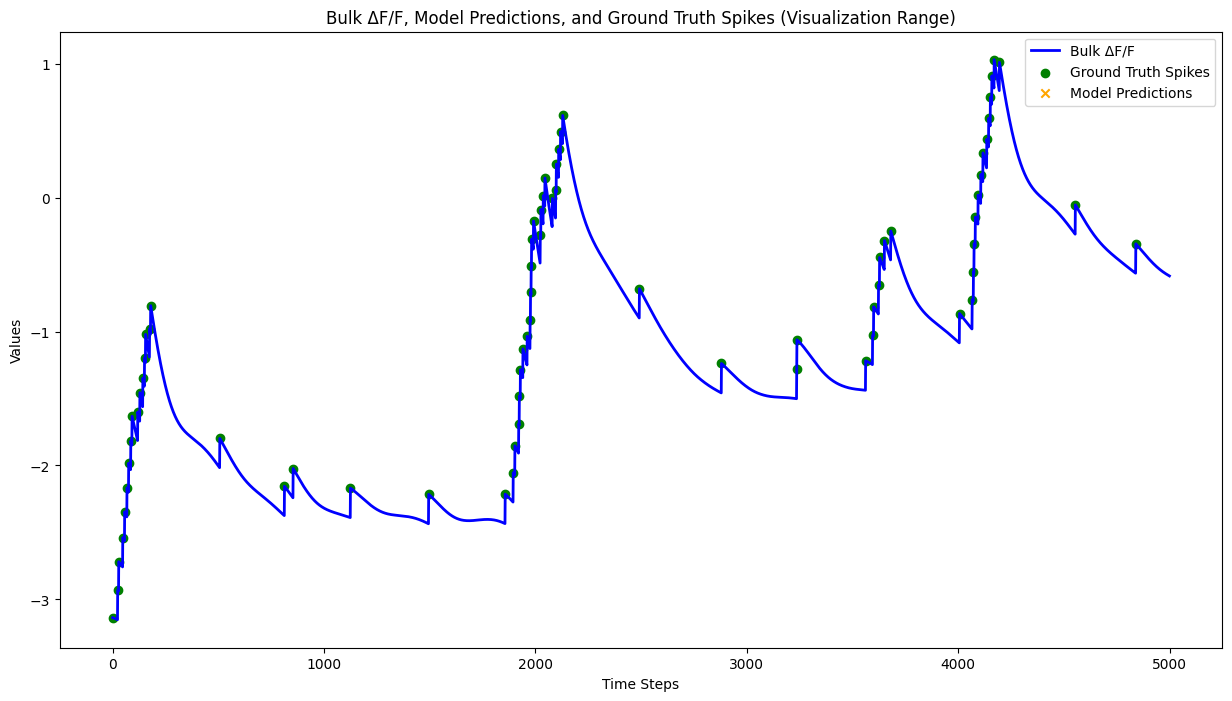

In [120]:
# Define the range to visualize (first 5000 points)
visualization_range = slice(0, 5000)
y_pred_binary = (y_pred > 0.5).astype(int)

# Plot the X portion
plt.figure(figsize=(15, 8))
plt.plot(X[visualization_range], label='Bulk ΔF/F', color='blue', linestyle='-', linewidth=2)

# Plot ground truth spikes within the range
spike_indices_in_range = np.where((y == 1) & 
                                  (np.arange(len(y)) >= visualization_range.start) & 
                                  (np.arange(len(y)) < visualization_range.stop))[0]
plt.scatter(spike_indices_in_range, X[spike_indices_in_range], label='Ground Truth Spikes', color='green', marker='o')

# Filter original_start_indices_test to be within the visualization range
original_start_indices_test_filtered = original_start_indices_test[
    (original_start_indices_test >= visualization_range.start) & 
    (original_start_indices_test + seq_length - 1 < visualization_range.stop)
]

# Filter y_pred_binary to match the filtered test sequences
y_pred_binary_filtered = y_pred_binary[original_start_indices_test_filtered]

# Get the indices of predicted spikes within the filtered test sequences
predicted_spike_indices_in_test_sequences = np.where(y_pred_binary_filtered == 1)[0]

# Map these indices back to the original_start_indices_test
predicted_spike_indices_in_original = original_start_indices_test_filtered[predicted_spike_indices_in_test_sequences]

# Plot the model predictions (on test data)
plt.scatter(
    predicted_spike_indices_in_original + seq_length - 1, 
    X[predicted_spike_indices_in_original + seq_length - 1], 
    label='Model Predictions', 
    color='orange', 
    marker='x'
)

plt.title('Bulk ΔF/F, Model Predictions, and Ground Truth Spikes (Visualization Range)')
plt.xlabel('Time Steps')
plt.ylabel('Values')
plt.legend()

plt.show()


In [110]:
sum(y_true)

89.0

In [184]:
def generate_sequences(X, y, seq_length, pre_spike_window=5, post_spike_window=95, burst_threshold=15):
    spike_indices = np.where(y == 1)[0]
    sequences = []
    labels = []
    original_start_indices = []

    # Iterate through spike indices
    i = 0
        # Check for burst
    while i < len(spike_indices):
        spike_idx = spike_indices[i]
        start_idx = max(0, spike_idx - pre_spike_window)
        end_idx = min(len(X), spike_idx + post_spike_window)
        label = "tonic"  # Default label

        # Check for burst (considering previous spike)
        if i > 0 and spike_idx - spike_indices[i - 1] <= burst_threshold:
            label = "burst"
            # Extend the sequence to include the entire burst
            while i < len(spike_indices) - 1 and spike_indices[i + 1] - spike_indices[i - 1] <= burst_threshold:
                i += 1
                end_idx = min(len(X), spike_indices[i] + post_spike_window)
        
        seq = X[start_idx:end_idx]

        # Pad sequences if necessary
        if len(seq) < seq_length:
            padding_len = seq_length - len(seq)
            seq = np.pad(seq, (0, padding_len), mode='constant')

        sequences.append(seq)
        labels.append(label)
        original_start_indices.append(start_idx)
        i += 1

    # Generate an equal number of sequences without spikes
    non_spike_indices = np.where(y == 0)[0]
    np.random.shuffle(non_spike_indices)
    non_spike_indices = non_spike_indices[:len(sequences)] 
    #reduced_num_non_spike_sequences = len(sequences) // 2  # Reduce by half
    #non_spike_indices = non_spike_indices[:reduced_num_non_spike_sequences]

    for non_spike_idx in non_spike_indices:
        start_idx = non_spike_idx
        end_idx = min(len(X), non_spike_idx + seq_length)
        seq = X[start_idx:end_idx]

        # Pad if necessary
        if len(seq) < seq_length:
            padding_len = seq_length - len(seq)
            seq = np.pad(seq, (0, padding_len), mode='constant')

        sequences.append(seq)
        labels.append("no spike")
        original_start_indices.append(start_idx)

    # Shuffle all sequences, labels, and original start indices
    max_seq_length = max(len(seq) for seq in sequences)

    # Pad sequences to maximum length
    all_sequences = []
    for seq in sequences:
        all_sequences.append(seq[0:seq_length])

    all_sequences = np.array(all_sequences)
    all_labels = np.array(labels)
    all_original_start_indices = np.array(original_start_indices) 
    
    #shuffle_indices = np.arange(len(all_sequences))
    #all_sequences = all_sequences[shuffle_indices]
    #np.random.shuffle(shuffle_indices)
    #all_labels = all_labels[shuffle_indices]
    #all_original_start_indices = all_original_start_indices[shuffle_indices]

    return all_sequences, all_labels, all_original_start_indices, seq_length

seq_length = 100  # 250 ms equivalent in points

# Load the ground truth data
ground_truth_df = pd.read_csv('/Users/reva/Documents/Python/SE_DA_FPM/data/ground_truth_data_s.csv')

# Extract features and target
X = ground_truth_df['Bulk ΔF/F'].values  
y = ground_truth_df['Bulk Spike Count'].values

# Define the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Assume X and y are already loaded and preprocessed
# Normalize X
#plt.plot(X_sequences)
##plt.plot(y_sequences)
#plt.show()
# Perform the split without shuffling (to preserve time series order)
X = (X - X.mean()) / X.std()
X_sequences, y_sequences, all_original_start_indices, max_seq_length = generate_sequences(X, y, seq_length)

# Reshape for LSTM (assuming 1 feature, which is ΔF/F)
X_sequences = X_sequences.reshape(-1, max_seq_length, 1)  

# Perform the split without shuffling (to preserve time series order)
X_train, X_test, y_train, y_test, original_start_indices_train, original_start_indices_test = train_test_split(
    X_sequences, y_sequences, all_original_start_indices, test_size=0.3, random_state=42, shuffle=False
)
# Convert labels to numerical 
label_mapping = {"no spike": 0, "tonic": 1, "burst": 2}
y_train_sequences = np.array([label_mapping[label] for label in y_train])
y_test_sequences = np.array([label_mapping[label] for label in y_test])


# Convert to tensors and send to device
X_train = torch.tensor(X_train, dtype=torch.float32).to(device)
y_train_sequences = torch.tensor(y_train_sequences, dtype=torch.long).to(device)  # LongTensor for CrossEntropyLoss
X_test= torch.tensor(X_test, dtype=torch.float32).to(device)
y_test_sequences = torch.tensor(y_test_sequences, dtype=torch.long).to(device) 


batch_size = 64
train_dataset = TensorDataset(X_train, y_train_sequences)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = TensorDataset(X_test, y_test_sequences)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False) 


input_size = 1  # Assuming one input feature
hidden_size = 128  # Number of units in GRU hidden layers
num_layers = 3  # Number of GRU layers
dropout_prob = 0.3  # Dropout probability
output_size =3
num_filters = 64  # Number of filters in the convolutional layers
kernel_size = 3  # Size of the convolutional kernel
# Define the GRU model

class CNNLSTMModel(nn.Module):
    def __init__(self, input_size, num_filters, kernel_size, hidden_size, num_layers, output_size, dropout_prob=0.5):
        super(CNNLSTMModel, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=input_size, out_channels=num_filters, kernel_size=kernel_size)
        self.conv2 = nn.Conv1d(in_channels=num_filters, out_channels=num_filters, kernel_size=kernel_size)
        self.pool = nn.MaxPool1d(kernel_size=2)
        self.lstm = nn.LSTM(input_size=num_filters, hidden_size=hidden_size, num_layers=num_layers, 
                            batch_first=True, dropout=dropout_prob)
        self.fc = nn.Linear(hidden_size, output_size)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        # CNN layers
        x = x.permute(0, 2, 1)  # Permute to (batch_size, channels, seq_length)
        x = F.relu(self.conv1(x))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.permute(0, 2, 1)  # Permute back to (batch_size, seq_length, channels)

        # LSTM layers
        h0 = torch.zeros(self.lstm.num_layers, x.size(0), self.lstm.hidden_size).to(x.device)
        c0 = torch.zeros(self.lstm.num_layers, x.size(0), self.lstm.hidden_size).to(x.device)
        out, _ = self.lstm(x, (h0, c0))
        out = out[:, -1, :]  # Take the last output 

        # Fully connected layer
        out = self.fc(out)
        out = self.softmax(out)
        return out
    
model = torch.load('/Users/reva/Documents/Python/SE_DA_FPM/results/Spike_infer_model.pth')


In [185]:
y_pred=[]
model.eval()
with torch.no_grad():
    all_outputs = []
    for inputs, _ in test_loader: 
        outputs = model(inputs)

        _, predicted_classes = torch.max(outputs, 1)  # Get the class with highest probability
        y_pred.extend(predicted_classes.cpu().numpy())

        all_outputs.append(outputs)

<Figure size 1200x600 with 0 Axes>

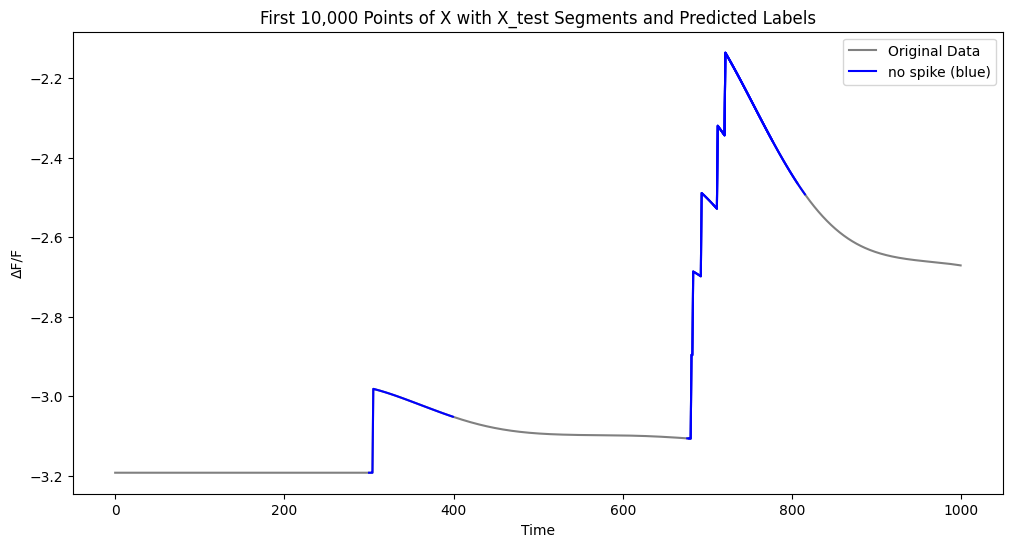

In [186]:
import matplotlib.pyplot as plt

# 1. Concatenate the first 50 sequences

# 2. Retrieve corresponding original start indices
original_start_indices_subset = original_start_indices_test

# 3. Get model predictions
model.eval()
with torch.no_grad():
    predictions = model(X_test)
    _, predicted_classes = torch.max(predictions, 1)
    predicted_labels = [list(label_mapping.keys())[list(label_mapping.values()).index(pred)] for pred in predicted_classes.cpu().numpy()]

# 4. Create color map
color_map = {'no spike': 'blue', 'tonic': 'green', 'burst': 'red'}

# 5. Plot concatenated sequences with colored segments
plt.figure(figsize=(12, 6))

import matplotlib.pyplot as plt



# 2. Overlay X_test segments with colors based on predicted labels
plt.figure(figsize=(12, 6))
plt.plot(X[:1000], color='gray', label='Original Data')

for i, (start_idx, label) in enumerate(zip(original_start_indices_train, predicted_labels)):
    if start_idx < 1000:
        end_idx = min(start_idx + seq_length, 1000)
        plt.plot(range(start_idx, end_idx), X[start_idx:end_idx], color=color_map[label], 
                 label=f"{label} ({color_map[label]})" if i == 0 else "")  # Add label with color

plt.title('First 10,000 Points of X with X_test Segments and Predicted Labels')
plt.xlabel('Time')
plt.ylabel('ΔF/F')
plt.legend()
plt.show()


300
no spike


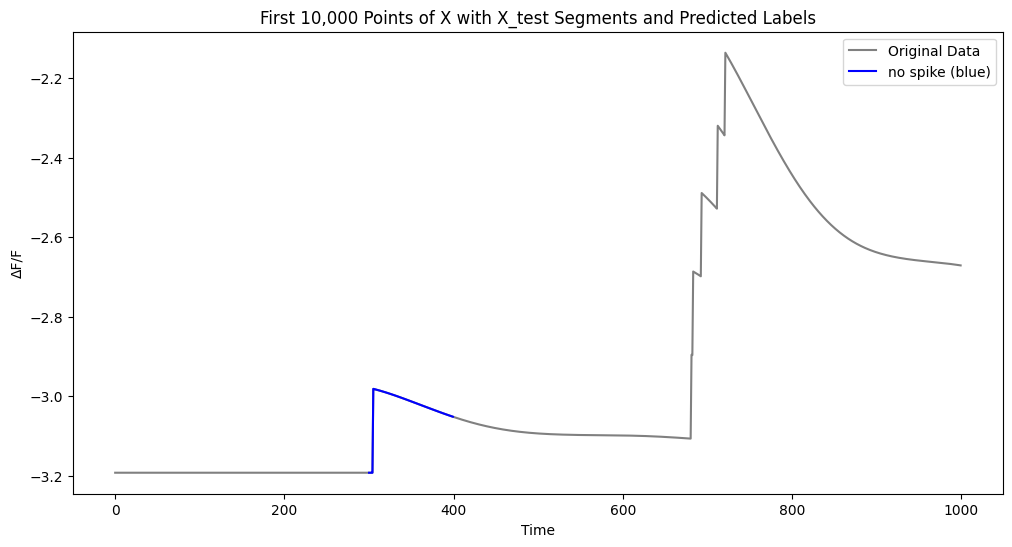

676
no spike


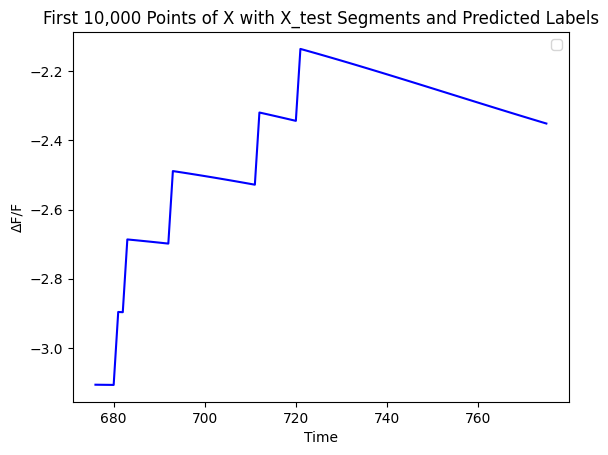

678
no spike


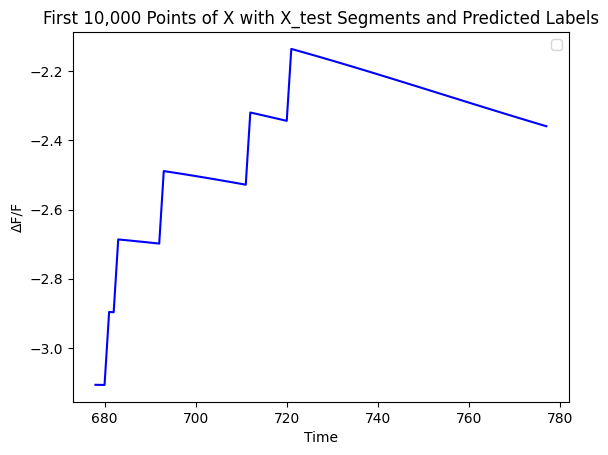

707
no spike


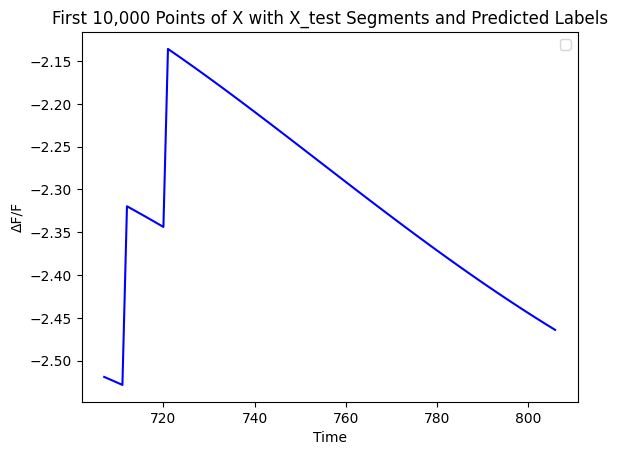

716
no spike


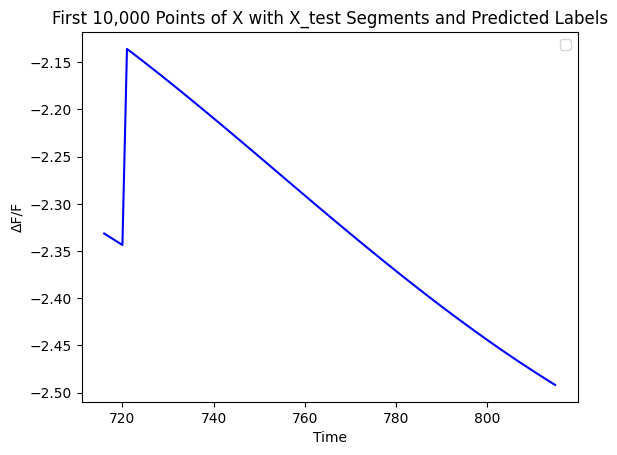

In [187]:
plt.figure(figsize=(12, 6))
plt.plot(X[:1000], color='gray', label='Original Data')

for i, (start_idx, label) in enumerate(zip(original_start_indices_train, predicted_labels)):
    if start_idx < 1000:
        print(start_idx)
        print(label)
        end_idx = min(start_idx + seq_length, 5000)
        plt.plot(range(start_idx, end_idx), X[start_idx:end_idx], color=color_map[label], label=f"{label} ({color_map[label]})" if i == 0 else "")  # Add label with color

        plt.title('First 10,000 Points of X with X_test Segments and Predicted Labels')
        plt.xlabel('Time')
        plt.ylabel('ΔF/F')
        plt.legend()
        plt.show()

In [183]:
all_original_start_indices

array([   295,    671,    673, ..., 140411, 401183, 684612])

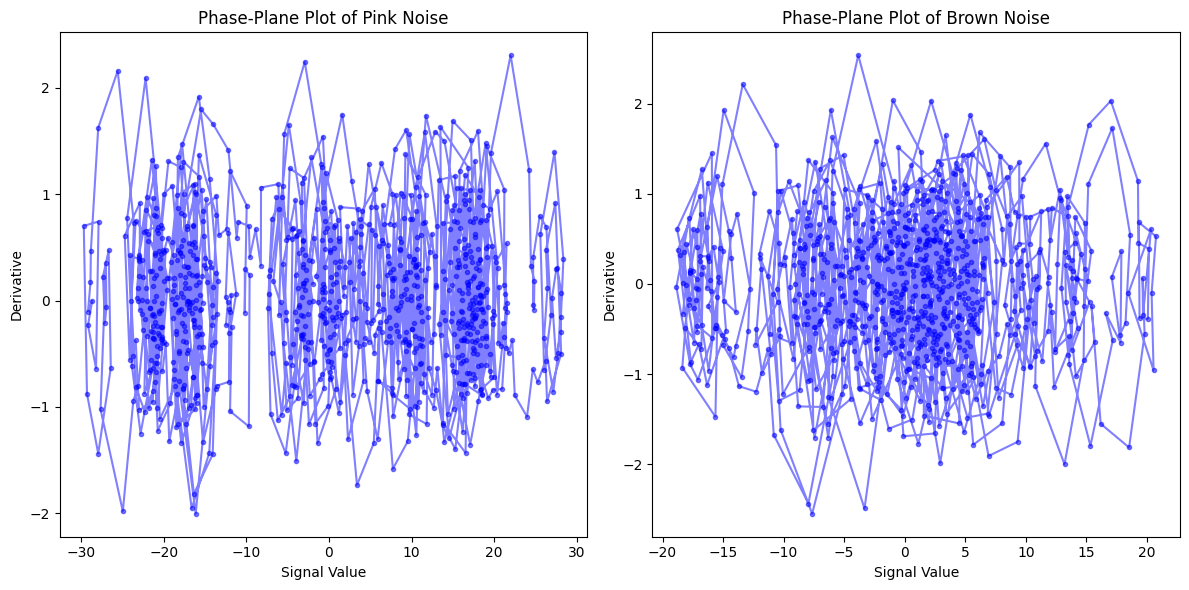

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Function to generate pink noise
def generate_pink_noise(size):
    white_noise = np.random.randn(size)
    pink_noise = np.cumsum(white_noise)  # Integrate white noise
    return pink_noise - np.mean(pink_noise)

# Function to generate brown noise
def generate_brown_noise(size):
    white_noise = np.random.randn(size)
    brown_noise = np.cumsum(white_noise)  # Integrate white noise
    return brown_noise - np.mean(brown_noise)

# Generate noise signals
size = 1000
pink_noise = generate_pink_noise(size)
brown_noise = generate_brown_noise(size)

# Compute derivatives
def compute_derivative(signal):
    return np.gradient(signal)

# Compute derivatives for phase-plane plots
pink_noise_deriv = compute_derivative(pink_noise)
brown_noise_deriv = compute_derivative(brown_noise)

# Plot phase-plane plots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].plot(pink_noise, pink_noise_deriv, '.', alpha=0.5, linestyle='-', color='blue')
axs[0].set_title('Phase-Plane Plot of Pink Noise')
axs[0].set_xlabel('Signal Value')
axs[0].set_ylabel('Derivative')

axs[1].plot(brown_noise, brown_noise_deriv, '.', alpha=0.5, linestyle='-', color='blue')
axs[1].set_title('Phase-Plane Plot of Brown Noise')
axs[1].set_xlabel('Signal Value')
axs[1].set_ylabel('Derivative')

plt.tight_layout()
plt.show()


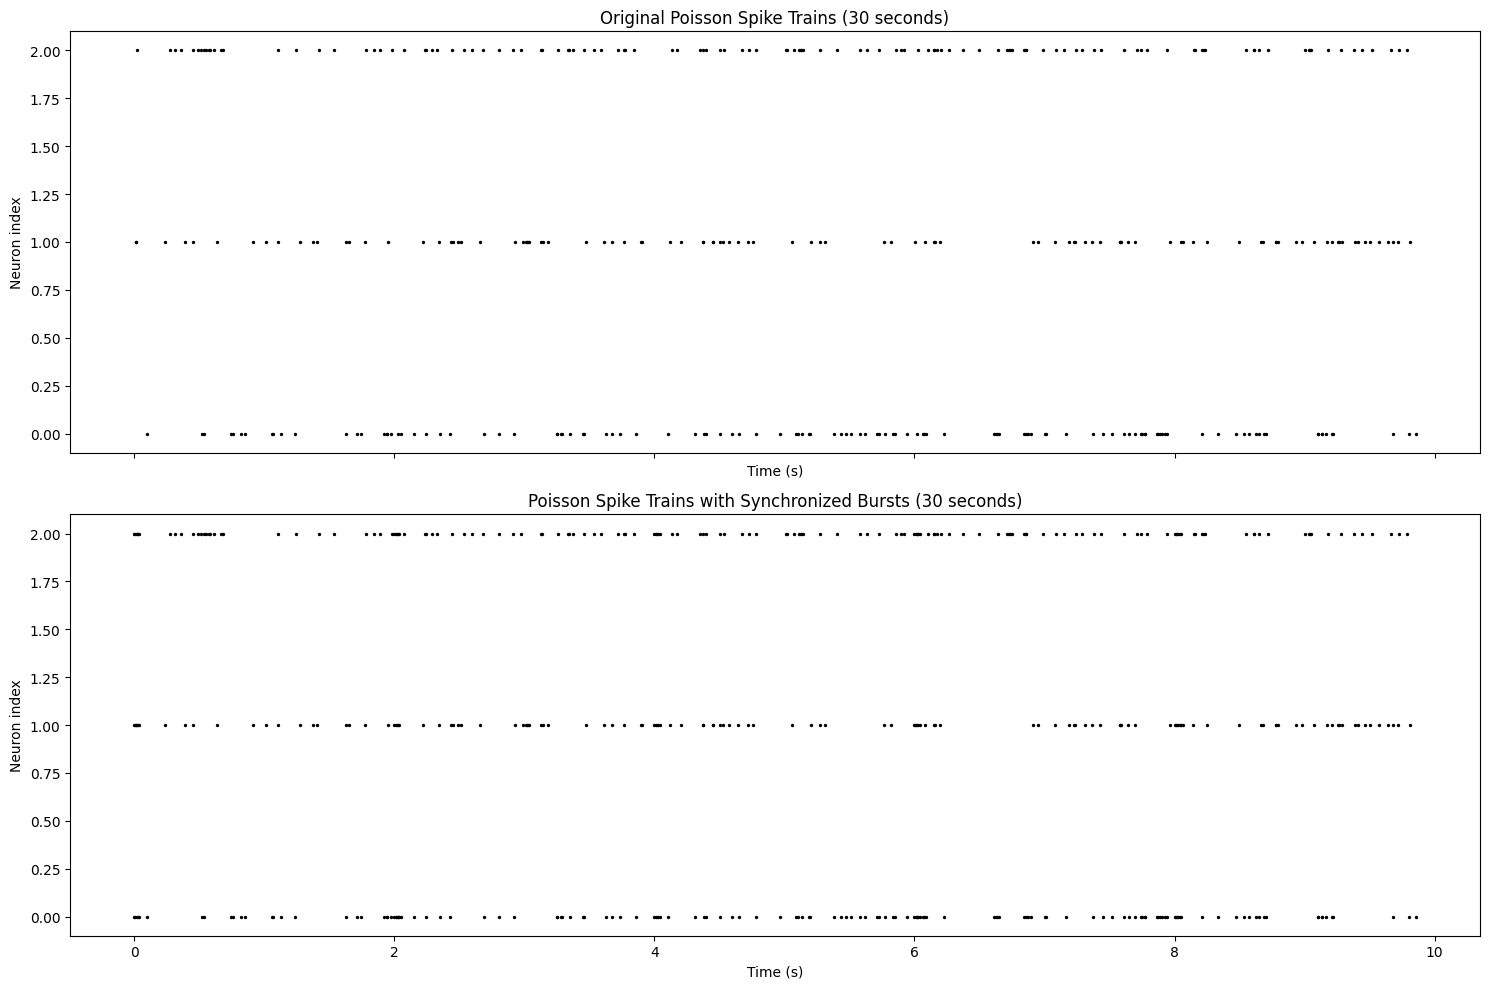

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def generate_poisson_spike_trains(num_neurons, duration=10, rate=10, dt=0.001):
    """
    Generate Poisson-distributed spike trains for multiple neurons.

    Parameters:
    - num_neurons: Number of neurons to generate spike trains for.
    - duration: Duration of the spike trains in seconds.
    - rate: Firing rate in Hz for each neuron.
    - dt: Time step in seconds (default: 0.001).

    Returns:
    - spike_trains: List of arrays, each array representing spike times for a neuron.
    """
    time_points = int(duration / dt)
    spike_trains = []

    for _ in range(num_neurons):
        # Generate spike train based on a Poisson distribution
        spike_train_binary = np.random.rand(time_points) < (rate * dt)
        spike_times = np.where(spike_train_binary)[0] * dt  # Convert indices to time
        spike_trains.append(spike_times)

    return spike_trains

def insert_synchronized_bursts(spike_trains, burst_times, burst_duration=0.05):
    """
    Insert synchronized bursts at specific times into the given spike trains.

    Parameters:
    - spike_trains: List of spike trains (each train is an array of spike times).
    - burst_times: List of times at which to insert synchronized bursts.
    - burst_duration: Duration of each synchronized burst (default: 0.05 seconds).

    Returns:
    - synchronized_spike_trains: List of spike trains with synchronized bursts added.
    """
    synchronized_spike_trains = [np.copy(spike_train) for spike_train in spike_trains]

    for burst_time in burst_times:
        for neuron_idx, spike_train in enumerate(synchronized_spike_trains):
            # Create a burst of spikes around the burst_time
            burst_spikes = np.arange(burst_time, burst_time + burst_duration, burst_duration / 5)  # 5 spikes per burst
            # Insert burst spikes into the spike train
            spike_train = np.concatenate([spike_train, burst_spikes])
            # Sort to maintain the temporal order
            synchronized_spike_trains[neuron_idx] = np.sort(spike_train)

    return synchronized_spike_trains

# Generate Poisson spike trains
np.random.seed(0)  # For reproducibility
num_neurons = 3  # Number of neurons to simulate (adjustable)
duration = 10  # Duration in seconds (same as in the uploaded image)
poisson_rate = 10  # Firing rate in Hz
dt = 0.001  # Time step in seconds

# Generate independent Poisson spike trains
poisson_spike_trains = generate_poisson_spike_trains(num_neurons, duration=duration, rate=poisson_rate, dt=dt)

# Define times at which to introduce synchronized bursts (e.g., every 5 seconds)
burst_times = np.arange(0, duration, 2)

# Insert synchronized bursts into the Poisson spike trains
synchronized_spike_trains = insert_synchronized_bursts(poisson_spike_trains, burst_times, burst_duration=0.05)

# Plotting function for raster plots
def plot_raster(spike_trains, title, ax):
    """
    Plot a raster plot of spike trains.

    Parameters:
    - spike_trains: List of spike trains (each train is an array of spike times).
    - title: Title of the plot.
    - ax: Matplotlib Axes object to plot on.
    """
    for neuron_idx, spike_train in enumerate(spike_trains):
        ax.scatter(spike_train, np.ones_like(spike_train) * neuron_idx, s=2, color="black")
    ax.set_title(title)
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Neuron index')

# Create a figure to compare independent Poisson and synchronized spike trains
fig, ax = plt.subplots(2, 1, figsize=(15, 10), sharex=True)

# Plot original Poisson spike trains
plot_raster(poisson_spike_trains, 'Original Poisson Spike Trains (30 seconds)', ax[0])

# Plot spike trains with synchronized bursts
plot_raster(synchronized_spike_trains, 'Poisson Spike Trains with Synchronized Bursts (30 seconds)', ax[1])

plt.tight_layout()
plt.show()
